This project will compare sales information of a selection of video games published between the years 1982 and 2015 using line plots, count plots and bar plots.

Graph 1 summarizes the number of games sold under different genres.

Graph 2 shows the most profitable years for the industry in this selection of data.

Graph 3 shows the number of unique titles published, regardless of brand/genre per year.

Graph 4 shows the most profitable console overall in this selection of data.

Graphs 5a, 5b & 5c all show the number of games sold per publisher in this selection of data, presented 3 ways.

In [30]:
pip install matplotlib --upgrade
# upgrades matplotlib to clear an error with bar_labels object below. Only needed for Google Colab version of project.

SyntaxError: invalid syntax (229251666.py, line 1)

In [ ]:
#import statements

import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# adds a grid to the background.

df = pd.read_csv("vgsales.csv", nrows=200) 
# imports the first 200 rows of the sales data file
df = df.dropna()
# should drop NaN values
df = df.sort_values(by="Year")
# should sort the rows numerically by year
df.head() # shows table


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28


In [ ]:
df["Genre"].value_counts() #shows amount of game entries per genre

# There was no need to find the mean, median or mode for this data set as those findings would have no bearing on the analysis below.

Action          36
Shooter         35
Platform        31
Role-Playing    30
Racing          16
Misc            15
Sports          13
Fighting         7
Simulation       7
Puzzle           6
Adventure        2
Strategy         1
Name: Genre, dtype: int64

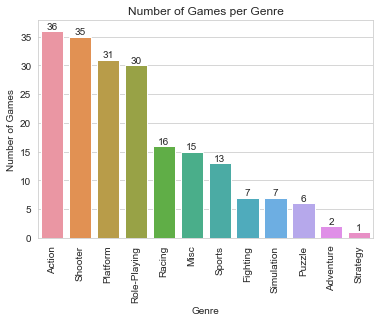

In [ ]:
# Graph 1 (Bar Graph/Count Plot)
# shows a graph of the above table

graph1 = sns.countplot(x="Genre", data=df,order = df["Genre"].value_counts().index)
graph1.set(ylabel="Number of Games")
# allows the renaming of the y label from "count" to "Number of Games" in this section of data.
graph1.set_title("Number of Games per Genre")
# titles the graph.
for container in graph1.containers:
    graph1.bar_label(container)
# shows a count label on each bar.
plt.xticks(rotation=90); # Rotates the x labels for readability.
# ; here removes text preceeding graph in output


From the above data, Action games (Such as The Legend of Zelda, etc) seem to be the most popular genre in this instance,
with FPS/Shooter games (Such as Call of Duty, etc) very close behind. Conversely, Strategy Games (Such as Fire Emblem) seem to be less common. 

Someone who wanted to make a new game that would be popular might choose to create an action genre game. 

Someone else who would want to make something nobody else has been making would choose to make a strategy game.

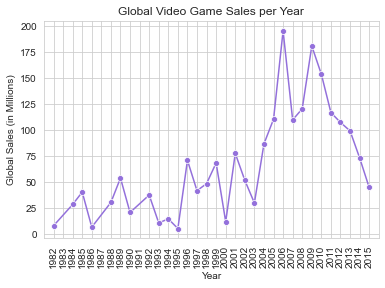

In [ ]:
# Graph 2 (Bar Graph)
# This section shows which year had the highest sales based on the data imported.

df["Year"] = df["Year"].apply(int)
# creates a cleaner look for the year labels so that they don"t appear as floats.

yearsales = df.groupby(by=["Year"])["Global_Sales"].sum()
yearsales = yearsales.reset_index()
# the pandas .groupby operation helps to create the containers or bars needed to more accurately show what I mean.
# It beautifully removes the need to write for loops, which I appreciate more than I can express (:
# .sum returns the sum of the columns in .groupby here -- again an optimization over for loops.
# reset_index resets the dataframe so that the graph below reads the column correctly, otherwise error. 

graph2 = sns.lineplot(x="Year", y="Global_Sales", data=yearsales, markers=True, marker="o", color="mediumpurple")
graph2.set_xlim(1981,2016)
graph2.set_xticks(range(1982,2016))
# sets x axis markers to each year by count of 1 instead of by count of 5.
plt.xticks(rotation=90); 
graph2.set(ylabel="Global Sales (in Millions)")
graph2.set_title("Global Video Game Sales per Year");


2006 was the most profitable year for the industry globally with this selection of data.

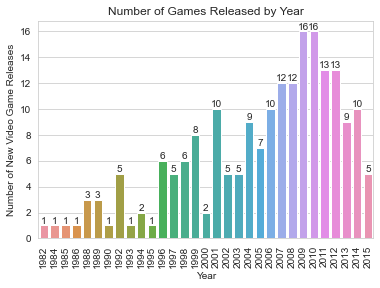

In [ ]:
# Graph 3 (Bar Graph / Count Plot)
# This chart shows which year had the most games released.


df["Year"] = df["Year"].apply(int)
# .apply here makes the year values appear normally instead of as floats.

graph3 = sns.countplot(x="Year", data=df, order=df.groupby(by=["Year"])["Name"].count().index)
# .count here literally counts items that are not n/a to provide the count (Y axis) of this chart. 
# Without .index we get an error, similar to how we would have had an error above by not using .reset_index
# it basically stores all labels for objects in pandas, which allows the graph to be made.

graph3.set(ylabel="Number of New Video Game Releases")
graph3.set_title("Number of Games Released by Year")

for container in graph3.containers:
    graph3.bar_label(container)

plt.xticks(rotation=90);


The years with the most games released were 2009 and 2010 for this small selection of sales data.

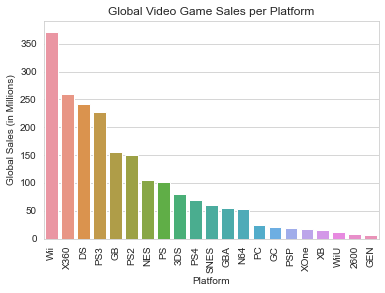

In [ ]:
# Graph 4 (Bar Graph)
# This section will show which console/platform had the most sales globally for this instance. 

platformsales = df.groupby(by=["Platform"])["Global_Sales"].sum()
platformsales = platformsales.reset_index()
platformsales = platformsales.sort_values(by=["Global_Sales"], ascending=False)

graph4 = sns.barplot(x="Platform", y="Global_Sales", data=platformsales)
graph4.set(ylabel="Global Sales (in Millions)")
graph4.set_title("Global Video Game Sales per Platform")

plt.xticks(rotation=90);

This chart shows clearly that software for the Nintendo Wii outsold its competitors and all its predecessors.

A business marketing their new game might opt to invest in porting their software to Nintendo Consoles to increase their overall sales.

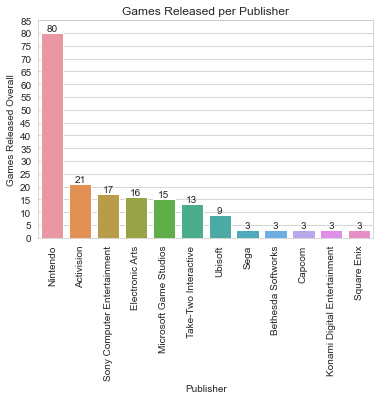

In [ ]:
# Graph 5a (Bar Graph / Count Plot)
# This section shows the top 12 game publishers overall in the selection of data we're working with. 

bestpublisher = df.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False)
bestpublisher = pd.DataFrame(bestpublisher).reset_index()

graph5 = sns.countplot(x="Publisher", data=df, order = df.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).iloc[:12].index)
# .iloc operation here finds data by row numbers. This picks out the top 12 publishers in this selection of data with the [:12].

graph5.set_yticks(range(0,86,5))
graph5.set(ylabel="Games Released Overall")
graph5.set_title("Games Released per Publisher")

for container in graph5.containers:
    graph5.bar_label(container)


plt.xticks(rotation=90);

Here we find that Nintendo is overwhelmingly the most productive publisher in this selection of data overall.
 
Someone considering creating their own game publishing company will be able to tell that their major competition is Nintendo.

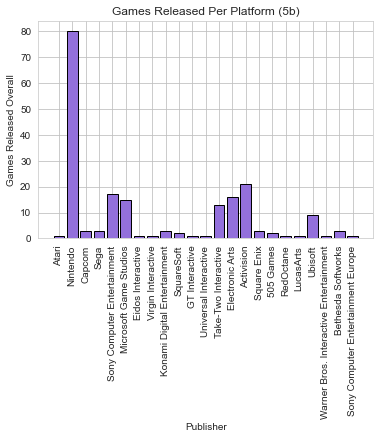

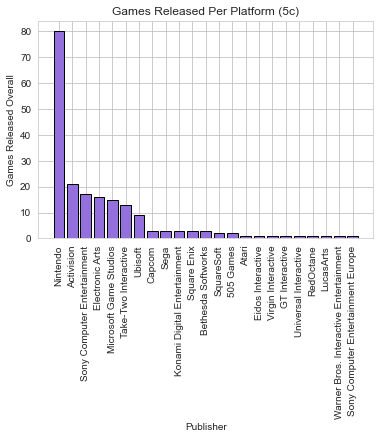

In [ ]:

# Bonus Graph 5b & 5c (Bar Graph / Count Plot)
# two different ways to code the same graph as above without pandas .groupby as used previously.


publisher = {}
for game in df["Publisher"]:
    if game in publisher.keys():
        publisher[game] += 1
    else:
        publisher[game] = 1

plt.bar(publisher.keys(), publisher.values(), color="mediumpurple", edgecolor="black")
plt.title("Games Released Per Platform (5b)")
plt.xlabel("Publisher")
plt.ylabel("Games Released Overall")
plt.xticks(rotation=90)
plt.grid(c="silver")
plt.show();     
        
from collections import OrderedDict as order
published = order(sorted(publisher.items(), key=lambda x: x[1], reverse=True))
# This orders the dictionary created above to provide a better visual and fixes the above problem.


plt.bar(published.keys(), published.values(), color="mediumpurple", edgecolor="black")
plt.title("Games Released Per Platform (5c)")
plt.xlabel("Publisher")
plt.ylabel("Games Released Overall")
plt.xticks(rotation=90)
plt.grid(c="silver")
plt.show();

Graphs 5b and 5c were needed in order for me to find a better, more efficient way to do the same thing.
For each instance where .groupby was eventually used above in all graphs, I did things the hard way first, 
and turned to more seasoned programmers online for answers to any errors I needed to fix or changes I wanted to make.
The graphs show the same numerical data as Graph 5a does -- 
(excusing that these show all the information from the selection of data instead of the top 12)
-- except initially it is difficult to read and not as well organized as when using .groupby and seaborn to present the data.

These graphs still show that, overwhelmingly, Nintendo is the most productive publisher in this selection of data.
However, the more organized graph requires multiple lines of code and an additonal import statement. 
The seaborn/pandas graph is more efficient and I can limit it to the top 12 publishers without additional lines of code, as shown in graph 5a.